In [1]:
#Populating interactive namespace for matplotlib
%matplotlib inline

#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Importing the dataset 
data = pd.read_csv('EEG_data.csv', sep=',')

In [2]:
#Structure data in pandas dataframe with 64 bits floats
df = pd.DataFrame(data, dtype='f8') 

#Assign column labels
df.columns = [
    'Subject', 
    'Video',   
    'Attention', 
    'Meditation', 
    'Raw',
    'Delta', 
    'Theta', 
    'Alpha1', 
    'Alpha2', 
    'Beta1', 
    'Beta2', 
    'Gamma1', 
    'Gamma2', 
    'predefinedlabel', 
    'userdefinedlabel'
]


In [3]:
#Check for missing values in df
msg_missing = 'Missing values in dataset'
assert(all(df.isnull() == False)), msg_missing

#Assign student number as major index
major = df['Subject'].values 

#Assign video number as minor index
minor = df['Video'].values

#Create MultiIndex from students and videos
df.index = pd.MultiIndex.from_arrays([major, minor])



In [4]:

#Name major and minor index
df.index.levels[0].set_names = 'Subject'
df.index.levels[1].set_names = 'Video'

In [5]:
df.index.set_names(['Subject', 'Video'], inplace=False)

MultiIndex([(0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            (0.0, 0.0),
            ...
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0),
            (9.0, 9.0)],
           names=['Subject', 'Video'], length=12811)

In [6]:
df[:200]

Subject  Video  Attention  Meditation    Raw      Delta     Theta  \
0.0 0.0      0.0    0.0       56.0        43.0  278.0   302000.0   90600.0   
    0.0      0.0    0.0       40.0        35.0  -50.0    73800.0   28100.0   
    0.0      0.0    0.0       47.0        48.0  101.0   758000.0  384000.0   
    0.0      0.0    0.0       47.0        57.0   -5.0  2010000.0  129000.0   
    0.0      0.0    0.0       44.0        53.0   -8.0  1010000.0  354000.0   
...          ...    ...        ...         ...    ...        ...       ...   
    1.0      0.0    1.0       50.0        37.0  -44.0  1580000.0  212000.0   
    1.0      0.0    1.0       56.0        29.0   48.0   339000.0  111000.0   
    1.0      0.0    1.0       47.0        37.0   44.0  2560000.0  108000.0   
    1.0      0.0    1.0       54.0        41.0   12.0   621000.0  110000.0   
    1.0      0.0    1.0       50.0        56.0  -21.0  1620000.0   77500.0   

           Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  \
0.0 0.0   33700.0  24000.0  27900.0   45100.0  33200.0   8290.0   
    0.0    1440.0   2240.0   2750.0    3690.0   5290.0   2740.0   
    0.0  202000.0  62100.0  36300.0  131000.0  57200.0  25400.0   
    0.0   61200.0  17100.0  11500.0   62500.0  50000.0  33900.0   
    0.0   37100.0  88900.0  45300.0   99600.0  44800.0  29700.0   
...           ...      ...      ...       ...      ...      ...   
    1.0   32400.0   5390.0  17600.0   46900.0  66700.0  52300.0   
    1.0    4460.0   6350.0  14300.0   37900.0  10800.0  10800.0   
    1.0   60200.0  49200.0  27400.0   47600.0  51500.0   8500.0   
    1.0   37300.0  17600.0  19000.0   42200.0  27100.0  15900.0   
    1.0   68500.0  20800.0  27900.0   16400.0  24200.0  19100.0   

         predefinedlabel  userdefinedlabel  
0.0 0.0              0.0               0.0  
    0.0              0.0               0.0  
    0.0              0.0               0.0  
    0.0              0.0               0.0  
    0.0              0.0               0.0  
...                  ...               ...  
    1.0              0.0               1.0  
    1.0              0.0               1.0  
    1.0              0.0               1.0  
    1.0              0.0               1.0  
    1.0              0.0               1.0  

[200 rows x 15 columns]

In [7]:
# print('Average observations for each student number')
# for stud_no in df.index.levels[0]:
#     no_of_observations = [len(df.loc[int(stud_no), int(vid_no)]) for vid_no in df.index.levels[1]]
#     print(int(stud_no), ':', np.array(no_of_observations).mean())

In [8]:
data_user_video = df.query('Subject==0')

In [9]:
features = ['Attention', 'Meditation', 'Raw', 'Delta',
            'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

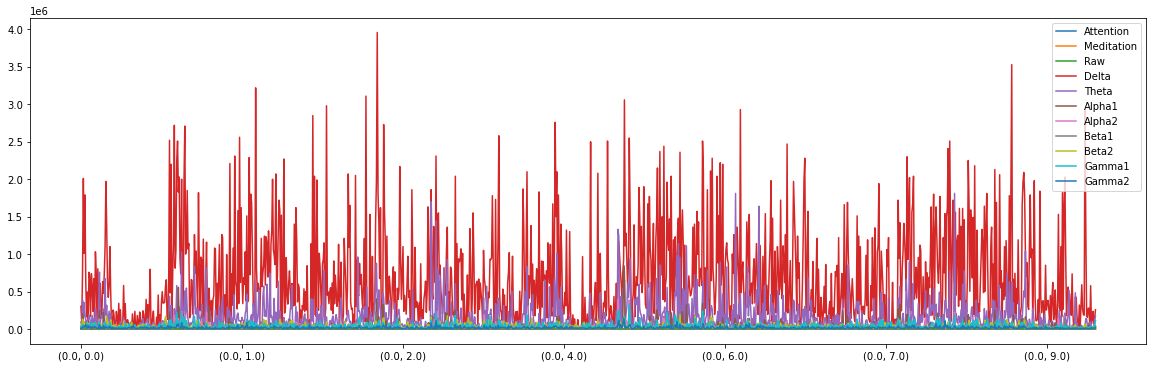

In [10]:
data_user_video[features].plot(figsize=(20,6))
plt.show()

In [11]:
data_user1_video1 = df.query('Subject==1')

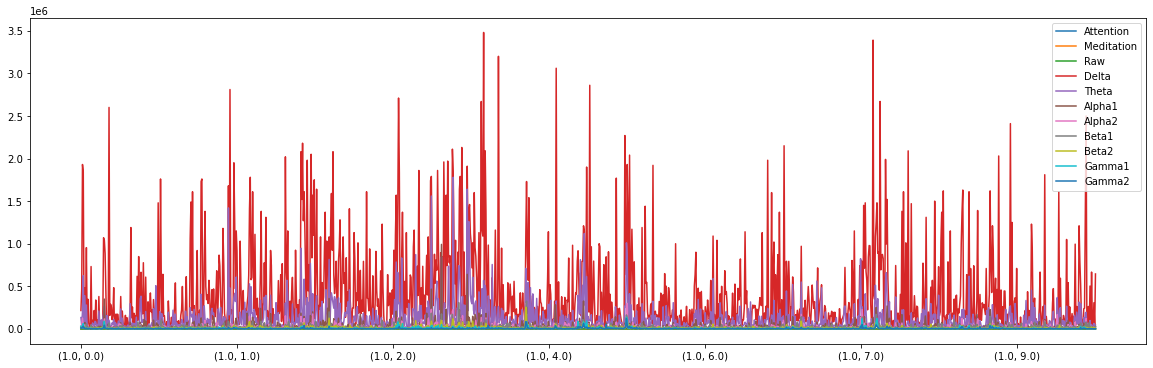

In [12]:
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

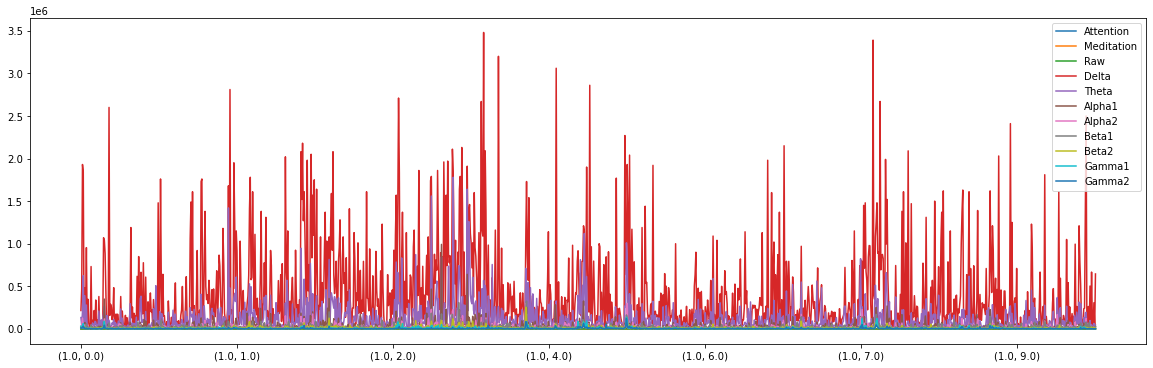

In [13]:
data_user2_video2 = df.query('Subject==2')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

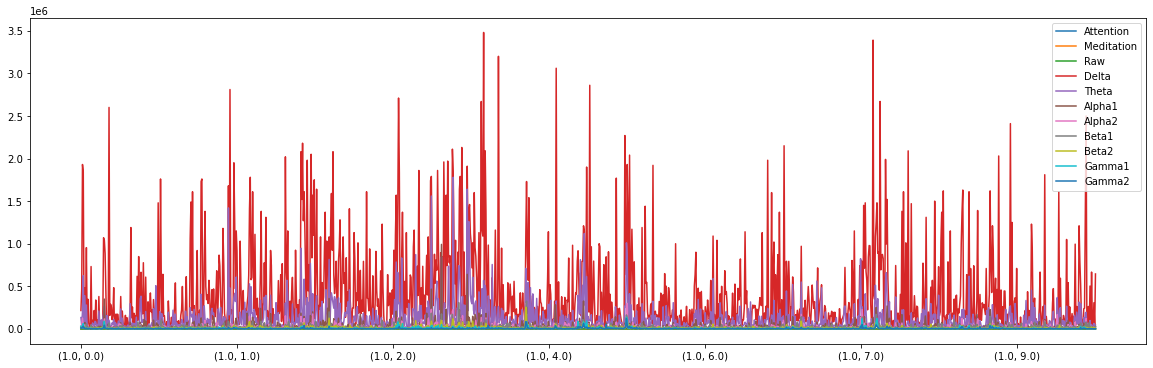

In [14]:
data_user3_video3 = df.query('Subject==3')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

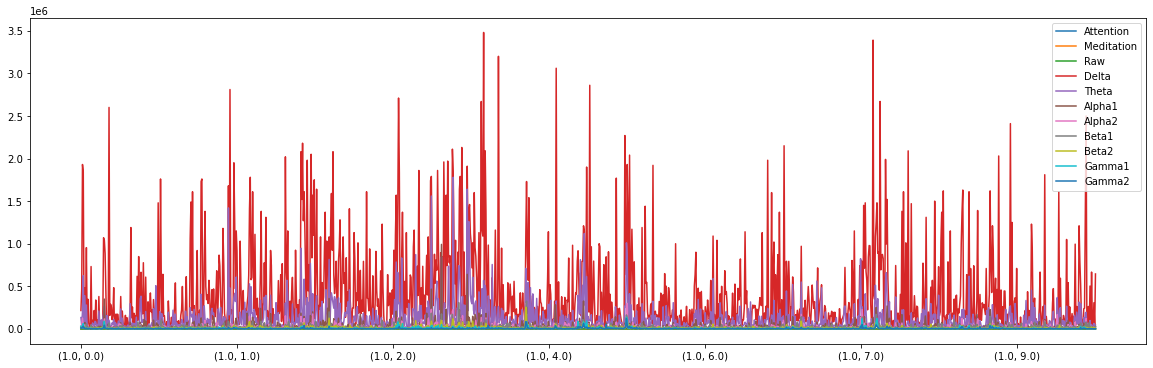

In [15]:
data_user4_video4 = df.query('Subject==4')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

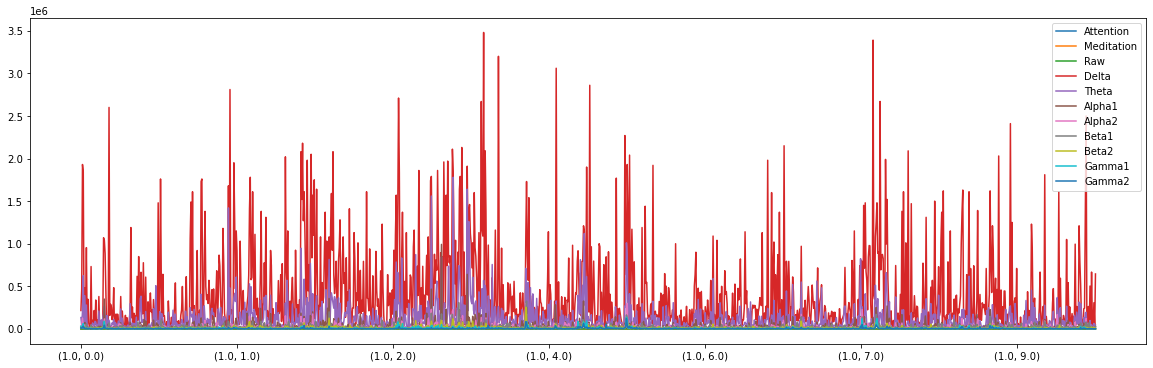

In [16]:
data_user5_video5 = df.query('Subject==5')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

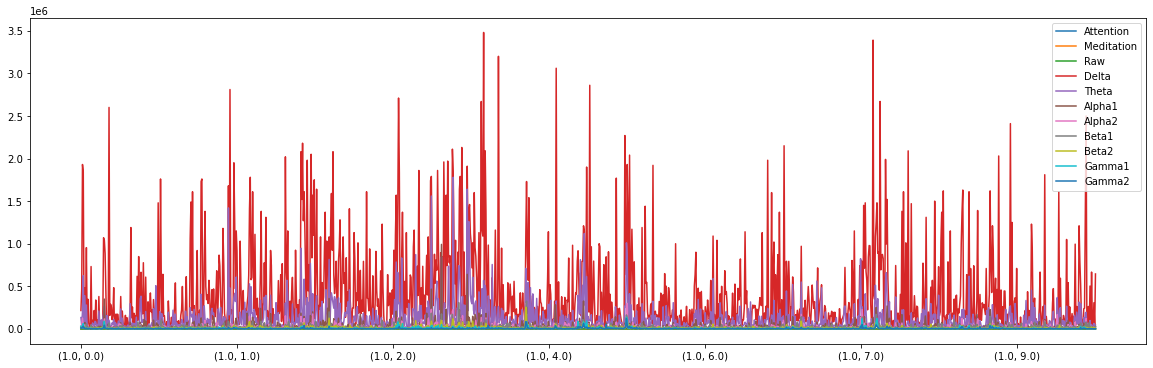

In [17]:
data_user6_video6 = df.query('Subject==6')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

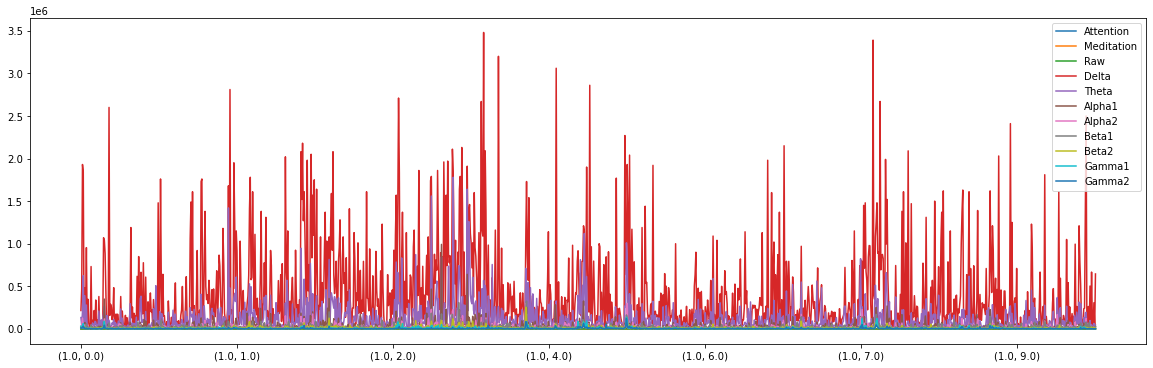

In [18]:
data_user7_video7 = df.query('Subject==7')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

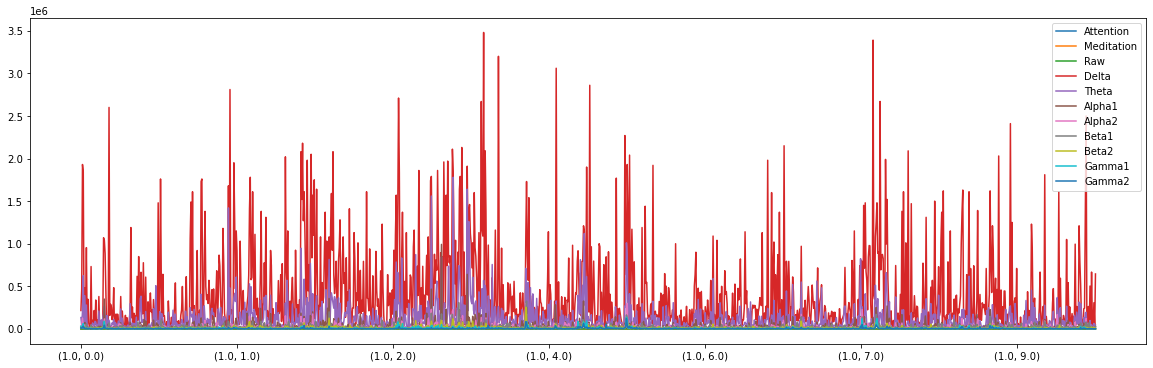

In [19]:
data_user8_video8 = df.query('Subject==8')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

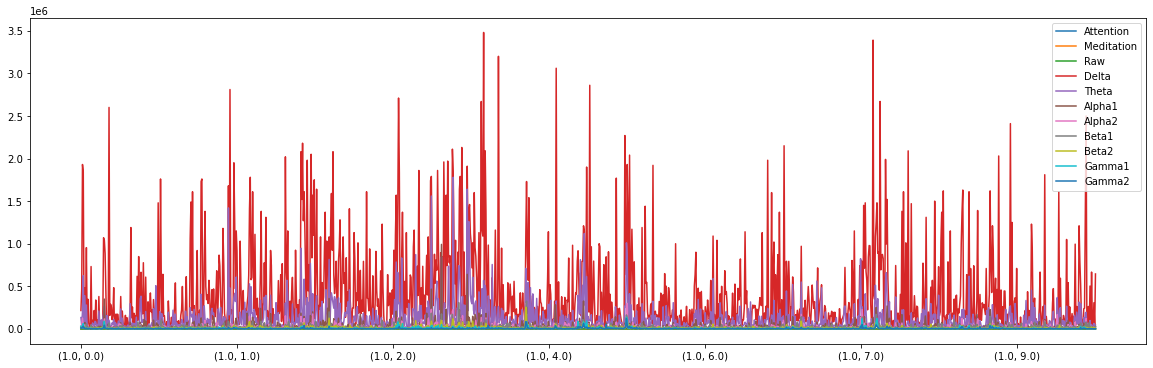

In [20]:
data_user9_video9 = df.query('Subject==9')
data_user1_video1[features].plot(figsize=(20,6))
plt.show()

In [70]:
# df['Subject'] = df['Subject'].astype(int)
# df['Video'] = df['Video'].astype(int)
# df['predefinedlabel'] = df['predefinedlabel'].astype(int)
# df['userdefinedlabel'] = df['userdefinedlabel'].astype(int)

In [21]:
del df['predefinedlabel']

In [22]:
df.iloc[:, 2:].describe()

,Attention,Meditation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,userdefinedlabel
count,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000
mean,41.313871,47.182656,65.628288,6.057873e+05,1.680461e+05,4.138325e+04,3.318419e+04,2.431939e+04,3.814329e+04,2.959277e+04,1.441612e+04,0.512606
std,23.152953,22.655976,598.541528,6.376272e+05,2.441232e+05,7.242636e+04,5.831937e+04,3.838424e+04,7.905932e+04,7.983078e+04,3.603291e+04,0.499861
min,0.000000,0.000000,-2050.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000
25%,27.000000,37.000000,-14.000000,9.810000e+04,2.690000e+04,6.840000e+03,6.850000e+03,6.140000e+03,7.360000e+03,4.060000e+03,2.170000e+03,0.000000
50%,43.000000,51.000000,35.000000,3.950000e+05,8.130000e+04,1.750000e+04,1.500000e+04,1.280000e+04,1.580000e+04,9.760000e+03,5.120000e+03,1.000000
75%,57.000000,63.000000,90.000000,9.170000e+05,2.050000e+05,4.480000e+04,3.455000e+04,2.740000e+04,3.550000e+04,2.490000e+04,1.270000e+04,1.000000
max,100.000000,100.000000,2050.000000,3.960000e+06,3.010000e+06,1.370000e+06,1.020000e+06,1.070000e+06,1.650000e+06,1.970000e+06,1.350000e+06,1.000000


In [23]:
#this is done to check if the data is balanced in term of the target
df['userdefinedlabel'].value_counts()

1.0    6567
0.0    6244
Name: userdefinedlabel, dtype: int64

In [24]:
#EXPLORATORY DATA ANALYSIS
#to determine the number of videos confusing to students

df1 = df.groupby(['Subject', 'Video'])['userdefinedlabel'].agg(lambda x: sum(x) > 0).unstack("Video")
df1

Video,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Subject,,,,,,,,,,
0.0,False,True,True,False,False,True,True,False,True,False
1.0,False,True,True,True,True,False,False,False,False,False
2.0,False,True,False,False,True,True,False,True,True,False
3.0,False,False,False,False,True,False,True,True,True,True
4.0,False,True,True,True,False,False,True,True,True,False
5.0,False,True,True,True,False,True,True,False,True,False
6.0,True,False,False,True,True,False,True,False,True,False
7.0,True,True,False,True,True,True,False,True,False,False
8.0,False,False,False,False,True,True,False,False,True,True


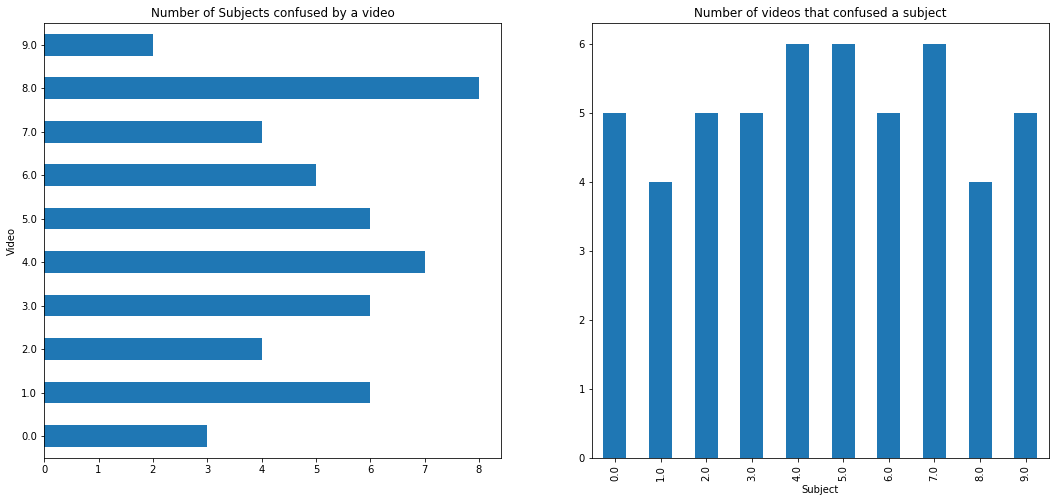

In [25]:
fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df1.apply(sum).plot(kind='barh', title='Number of Subjects confused by a video')
plt.subplot(1, 2, 2)
df1.apply(sum, axis=1).plot(kind='bar', title="Number of videos that confused a subject")
plt.show()

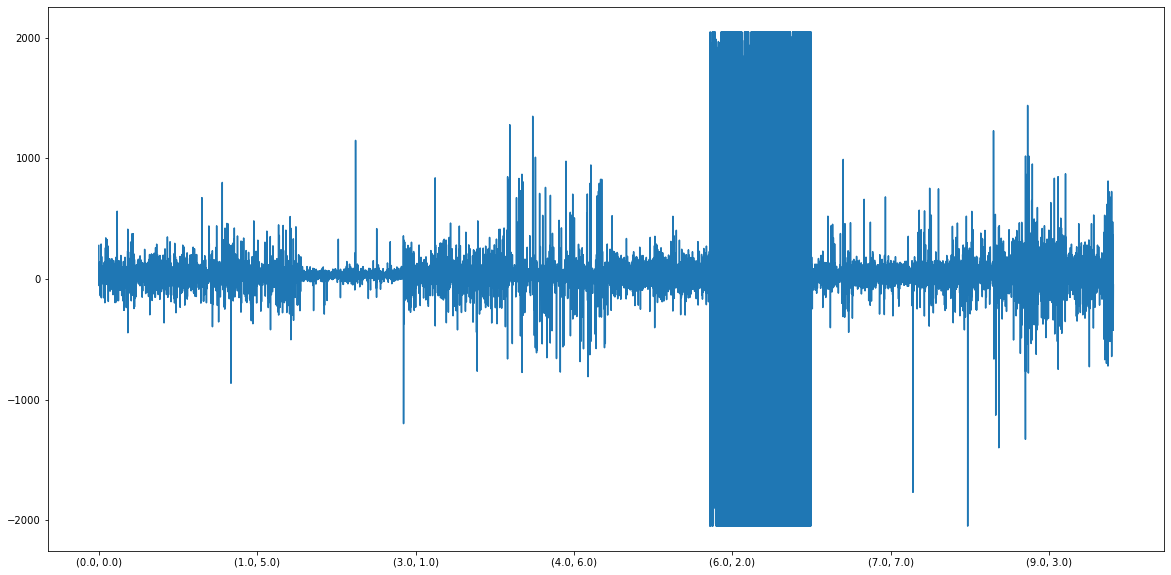

In [26]:
#plotting each attributes in the data

df['Raw'].plot(figsize=(20,10))
plt.show()

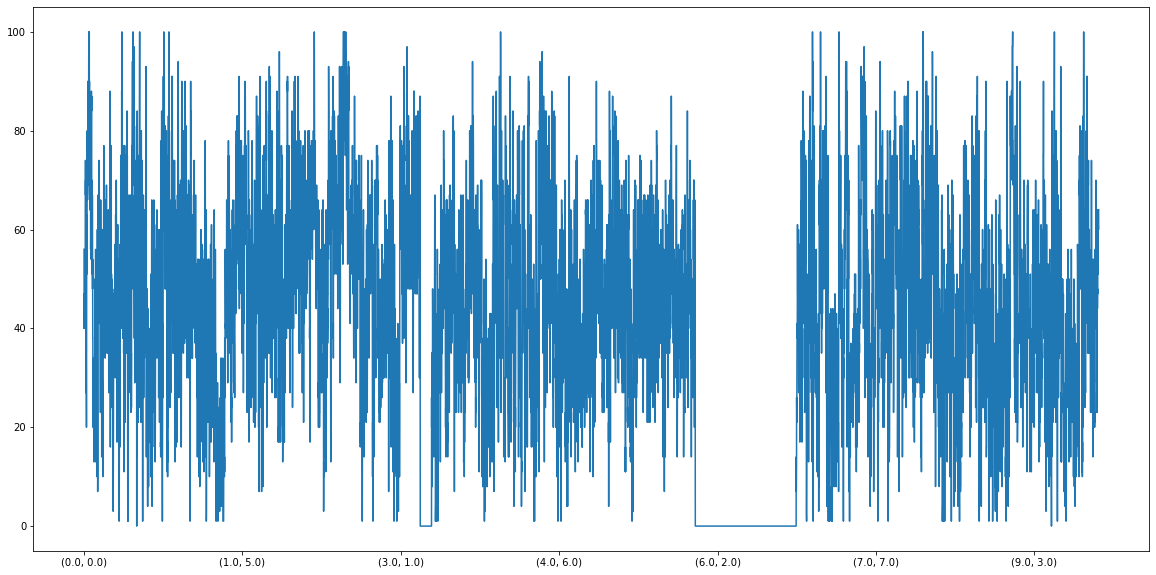

In [27]:
df['Attention'].plot(figsize=(20,10))
plt.show()

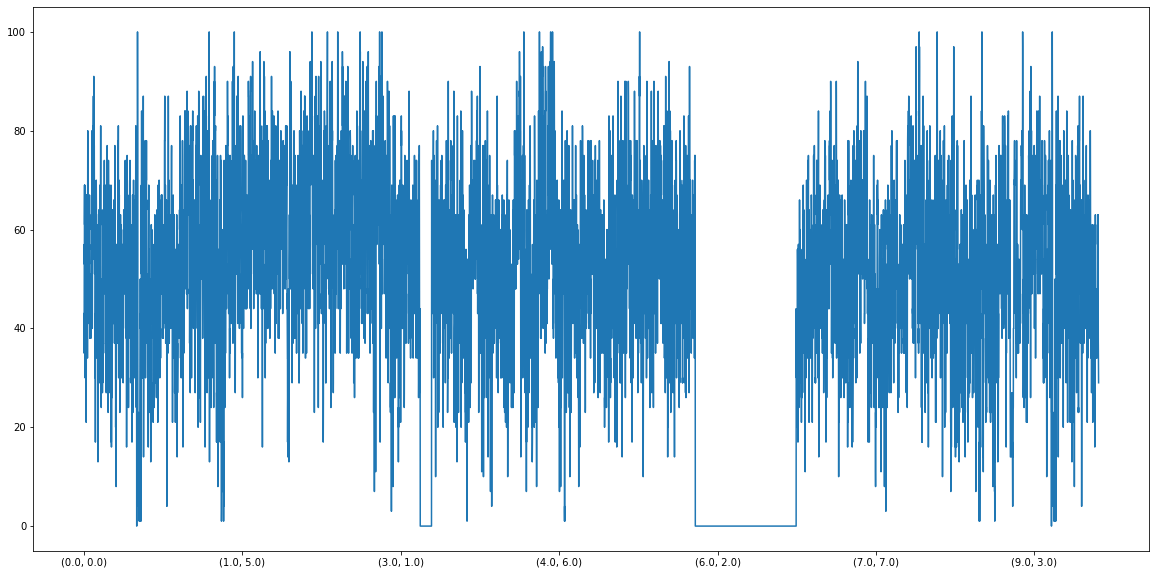

In [28]:
df['Meditation'].plot(figsize=(20,10))
plt.show()

In [29]:
#from the plot above this is discovered that the data is corrupt in subject 3 and also one of it's video, and also almost all the data in subject 6 are corrupt 

In [30]:
#checking to see which part of the data is corrupted

df.groupby(['Subject', 'Video']).filter(lambda x: x['Attention'].sum()==0).groupby(['Subject', 'Video']).size()

Subject  Video
3.0      3.0      144
6.0      0.0      140
         1.0      142
         2.0      122
         3.0      116
         4.0      144
         5.0      123
         6.0      116
         7.0      113
         8.0      122
         9.0      137
dtype: int64

In [31]:
df.groupby(['Subject', 'Video']).filter(lambda x: x['Meditation'].sum()==0).groupby(['Subject', 'Video']).size()

Subject  Video
3.0      3.0      144
6.0      0.0      140
         1.0      142
         2.0      122
         3.0      116
         4.0      144
         5.0      123
         6.0      116
         7.0      113
         8.0      122
         9.0      137
dtype: int64

From the above it is discovered that data from subject 6 was corrupt... and subject 3, while watching the third videos
had a corrupt file. Based on that the 6 subject and 3 subject watching video 3 data will be excluded from the main dataset.

In [32]:
#removing the corrupt data from the dataset and return the new length
EEG_data = df.query('(Subject != 6) & (Subject != 3 | Video !=3)')
len(EEG_data), len(df)

(11392, 12811)

In total i will be working with 11392 instances, inplace of 12811

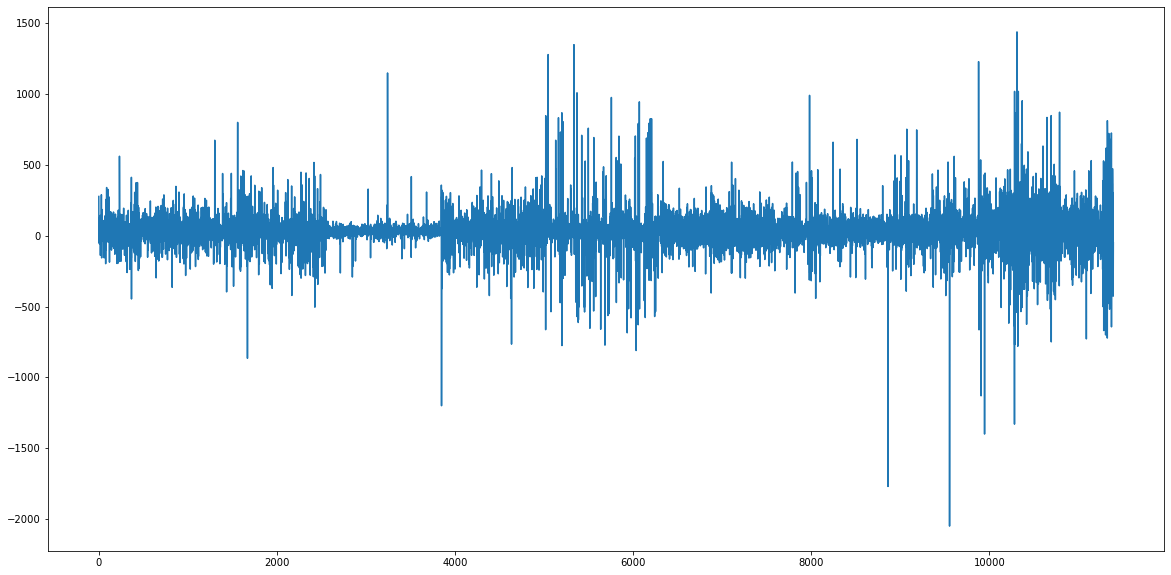

In [33]:
EEG_data.reset_index()['Raw'].plot(figsize=(20,10))
plt.show()

In [34]:
# del EEG_data['Subject']
# del EEG_data['Video']

In [35]:
#To check for the correlation of the EEG data

EEGdata =  EEG_data.corr()
EEGdata

,Attention,Meditation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,userdefinedlabel
Attention,1.000000,0.162696,-0.008387,-0.237342,-0.272607,-0.187218,-0.156180,-0.125260,0.018601,-0.074250,-0.040691,-0.200929
Meditation,0.162696,1.000000,0.016332,-0.088898,-0.168202,0.065480,0.044050,-0.049901,-0.089442,-0.074636,-0.094576,-0.087938
Raw,-0.008387,0.016332,1.000000,-0.008381,-0.003859,-0.014956,-0.011941,-0.044486,-0.018563,-0.011216,-0.023189,0.000161
Delta,-0.237342,-0.088898,-0.008381,1.000000,0.485262,0.434461,0.415085,0.410706,0.385187,0.391987,0.309973,0.159459
Theta,-0.272607,-0.168202,-0.003859,0.485262,1.000000,0.600322,0.584800,0.597835,0.491862,0.486855,0.415509,0.148237
Alpha1,-0.187218,0.065480,-0.014956,0.434461,0.600322,1.000000,0.557954,0.561415,0.461481,0.485686,0.376639,0.120310
Alpha2,-0.156180,0.044050,-0.011941,0.415085,0.584800,0.557954,1.000000,0.589896,0.557565,0.532355,0.365804,0.101887
Beta1,-0.125260,-0.049901,-0.044486,0.410706,0.597835,0.561415,0.589896,1.000000,0.464228,0.492620,0.486402,0.125023
Beta2,0.018601,-0.089442,-0.018563,0.385187,0.491862,0.461481,0.557565,0.464228,1.000000,0.562501,0.422546,0.068261
Gamma1,-0.074250,-0.074636,-0.011216,0.391987,0.486855,0.485686,0.532355,0.492620,0.562501,1.000000,0.646057,0.094542


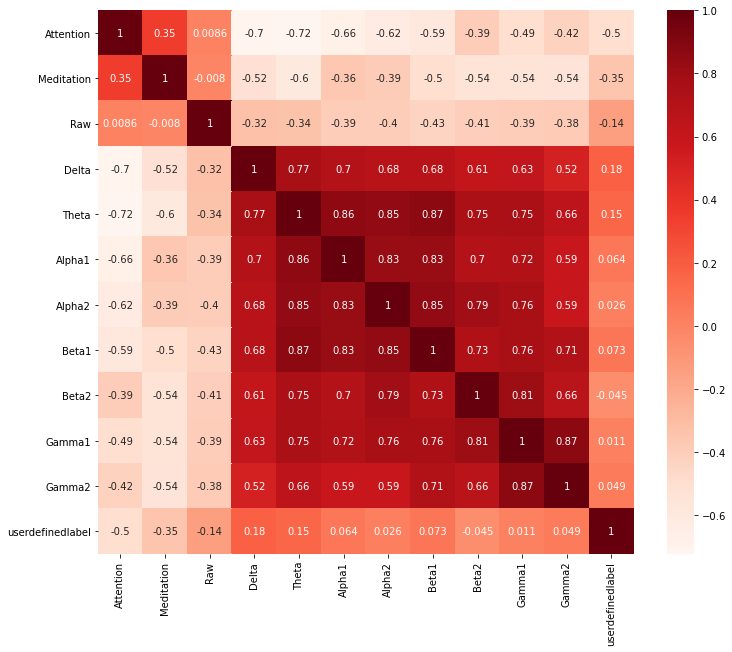

In [36]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = EEGdata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
# it is notices that the dataset for each of the varible are not equally and with this it is stated that the datapoint have to be equal
# for all subject before carrying out the pca. to do this i will use the mean of all the value obtained from the videos the student observed and use
# used that as the datapoint. 

#that will indicate that the for each student they are 10 datapoint 

In [34]:
df3 = EEG_data.groupby(by=['Subject', 'Video'])['Attention','Meditation','Raw','Delta','Theta',
                                                'Alpha1','Alpha2','Beta1','Beta2','Gamma1',
                                                'Gamma2','userdefinedlabel'].mean()

<ipython-input-34-b9167dddca3c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = EEG_data.groupby(by=['Subject', 'Video'])['Attention','Meditation','Raw','Delta','Theta',


In [35]:
df3

Attention  Meditation        Raw          Delta          Theta  \
Subject Video                                                                   
0.0     0.0    55.256944   53.826389  46.986111  544319.375000  124953.680556   
        1.0    43.621429   48.621429  28.800000  739692.857143  161056.507143   
        2.0    43.978873   47.316901  13.154930  694419.718310  149828.028169   
        3.0    51.057377   51.844262  34.713115  600810.409836  162644.426230   
        4.0    55.224138   47.474138  30.008621  546538.534483  126886.379310   
...                  ...         ...        ...            ...            ...   
9.0     5.0    49.813008   41.048780  38.804878  935067.479675  282519.593496   
        6.0    29.620690   53.293103  16.543103  780572.413793  193229.913793   
        7.0    27.633929   48.366071  22.482143  733178.571429  137467.142857   
        8.0    55.548387   52.879032  29.564516  914397.580645  198885.806452   
        9.0    45.262295   46.557377  26.155738  873581.147541  162477.295082   

                     Alpha1        Alpha2         Beta1         Beta2  \
Subject Video                                                           
0.0     0.0    36699.347222  25876.409722  20111.736111  40270.000000   
        1.0    34915.157143  25080.214286  22156.728571  37404.778571   
        2.0    30487.330986  21664.000000  21887.450704  36451.690141   
        3.0    33369.065574  26272.622951  17213.950820  43703.934426   
        4.0    23111.379310  17019.931034  15958.551724  36428.017241   
...                     ...           ...           ...           ...   
9.0     5.0    70474.016260  40751.113821  28635.585366  41461.869919   
        6.0    74624.974138  44057.189655  23815.146552  25937.844828   
        7.0    37671.285714  28576.508929  14773.071429  19905.535714   
        8.0    42276.854839  25930.467742  20326.137097  36780.000000   
        9.0    42511.516393  37861.467213  15350.024590  56492.622951   

                     Gamma1        Gamma2  userdefinedlabel  
Subject Video                                                
0.0     0.0    40730.694444  16814.375000               0.0  
        1.0    36761.100000  14520.857143               1.0  
        2.0    33909.147887  14547.316901               1.0  
        3.0    41420.655738  16563.442623               0.0  
        4.0    36026.120690  14759.543103               0.0  
...                     ...           ...               ...  
9.0     5.0    54069.268293  22654.691057               1.0  
        6.0    17280.163793   3855.741379               0.0  
        7.0    18245.357143   2697.607143               0.0  
        8.0    45423.064516  17553.830645               1.0  
        9.0    22270.081967   2996.319672               0.0  

[89 rows x 12 columns]

In [72]:
# deriving the mean of each of the attribute in the 
df2 = data.groupby(by=['Subject', 'Video'])['Attention','Meditation','Raw','Delta','Theta',
                                                'Alpha1','Alpha2','Beta1','Beta2','Gamma1',
                                                'Gamma2','userdefinedlabel'].mean()

<ipython-input-72-411631352329>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [73]:
df2[:10]

Attention  Meditation        Raw          Delta          Theta  \
Subject Video                                                                   
0.0     0.0    55.256944   53.826389  46.986111  544319.375000  124953.680556   
        1.0    43.621429   48.621429  28.800000  739692.857143  161056.507143   
        2.0    43.978873   47.316901  13.154930  694419.718310  149828.028169   
        3.0    51.057377   51.844262  34.713115  600810.409836  162644.426230   
        4.0    55.224138   47.474138  30.008621  546538.534483  126886.379310   
        5.0    49.813008   41.048780  38.804878  935067.479675  282519.593496   
        6.0    33.586207   44.310345  44.224138  785178.448276  212902.241379   
        7.0    48.000000   50.241071  28.267857  478034.017857  114140.535714   
        8.0    55.548387   52.879032  29.564516  914397.580645  198885.806452   
        9.0    49.934426   47.270492  37.286885  602329.508197  130768.770492   

                     Alpha1        Alpha2         Beta1         Beta2  \
Subject Video                                                           
0.0     0.0    36699.347222  25876.409722  20111.736111  40270.000000   
        1.0    34915.157143  25080.214286  22156.728571  37404.778571   
        2.0    30487.330986  21664.000000  21887.450704  36451.690141   
        3.0    33369.065574  26272.622951  17213.950820  43703.934426   
        4.0    23111.379310  17019.931034  15958.551724  36428.017241   
        5.0    70474.016260  40751.113821  28635.585366  41461.869919   
        6.0    35399.172414  24324.310345  19988.293103  30957.844828   
        7.0    25734.571429  16241.357143  15280.937500  37800.339286   
        8.0    42276.854839  25930.467742  20326.137097  36780.000000   
        9.0    26436.262295  20617.213115  20125.622951  29251.721311   

                     Gamma1        Gamma2  userdefinedlabel  
Subject Video                                                
0.0     0.0    40730.694444  16814.375000               0.0  
        1.0    36761.100000  14520.857143               1.0  
        2.0    33909.147887  14547.316901               1.0  
        3.0    41420.655738  16563.442623               0.0  
        4.0    36026.120690  14759.543103               0.0  
        5.0    54069.268293  22654.691057               1.0  
        6.0    30171.724138  14367.224138               1.0  
        7.0    36328.571429  13715.821429               0.0  
        8.0    45423.064516  17553.830645               1.0  
        9.0    28182.786885  11690.672131               0.0

In [74]:
df2.shape

(100, 12)

Hence,  𝑑𝑓∈ℝ𝟙𝟚𝟠𝟙𝟘,𝟙𝟘→𝑑𝑓𝑎𝑣𝑒∈ℝ𝟙𝟘𝟘,𝟙𝟘 .

10 students, 10 datapoints as average of time recordings for each video
8 columns of signal data
2 columns of expected and observed level of confusion among students
not confused = 0, confused = 1
all values as floats
no missing data

In [36]:
#PCA.... Number of 
X = EEG_data.loc[:, 'Attention':'Gamma2']

pca = PCA(n_components = 11, 
         copy = False,
         whiten = False,
         svd_solver = 'auto',
         tol = 0.0,
         iterated_power = 'auto',
         random_state = None
         )
#fit_transform(X[, y]) Fit the model with X and apply the dimensionality reduction on X.

X_transform = pca.fit_transform(X)

In [47]:
import plotly.express as px

fig = px.scatter_matrix(
    df3,
    dimensions=features,
    color=df3['userdefinedlabel']
)
fig.update_traces(diagonal_visible=False)
fig.show(figsize = (20,10))

In [78]:
#import plotly.express as px

X = df3.loc[:, 'Attention': 'Gamma2']
pca = PCA(n_components = 4, 
         copy = False,
         whiten = False,
         svd_solver = 'auto',
         tol = 0.0,
         iterated_power = 'auto',
         random_state = None
         )

X_trans = pca.fit_transform(X)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_trans,
    labels=labels,
    dimensions=range(4),
    color=df3["userdefinedlabel"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [53]:


pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df3['userdefinedlabel'])
fig.show()

In [58]:
datapoints = df3.shape[0]

In [59]:
datapoints

89

In [62]:
#Extract PC1 to 3 and adjust values for more readable format

pc1 = X_trans[:, 0] 
pc2 = X_trans[:, 1] 
pc3 = X_trans[:, 2] 
pc4 = X_trans[:, 3] 


In [76]:
#import plotly.express as px

X = df2.loc[:, 'Attention': 'Gamma2']
pca = PCA(n_components = 4, 
         copy = False,
         whiten = False,
         svd_solver = 'auto',
         tol = 0.0,
         iterated_power = 'auto',
         random_state = None
         )

X_trans = pca.fit_transform(X)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_trans,
    labels=labels,
    dimensions=range(4),
    color=df2["userdefinedlabel"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

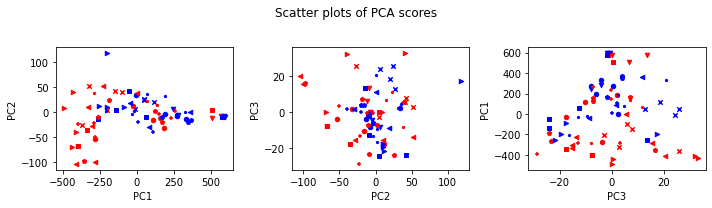

In [135]:
#Extract the value of the PCA that are more than 0.5% and divide it by 1000 to give a clear and more meaningful readings

pc1 = X_trans[:, 0]/1000 
pc2 = X_trans[:, 1] /1000
pc3 = X_trans[:, 2] /1000
# pc4 = X_trans[:, 3] / 1000

#Assign markers to separate students
m = [
    "x", # Student no 1
    "o", 
    "v", 
    "s", 
    "p", # student no 6 had been deleted from the dataset
    "+", #Student no 7
    "<", 
    ".", 
    ">" # Student no 10
]

markers1 = [marker for marker in m for j in range(9)]

#Assign colors to separate confused students from not confused students
colors1 = ['r' if int(student_confused) == 1 else 'blue' for student_confused in df3['userdefinedlabel']]

#File name
save_name = 'score1.jpg'

#Plotting
def scorePlots(pc1, pc2, pc3, markers, colors, save_name):
    '''
    Creates scatter plots of PCA scores, markers and color labels as three 
    subplots in one figure of size [10, 3]. Axis labels are respective PC's.
    
    Args:
        pc1 (ndarray) : 1D array of PC1 scores
        pc2 (ndarray) : 1D array of PC2 scores
        pc3 (ndarray) : 1D array of PC3 scores
        markers (list) : list of markers for (1) each scores, (2) confused/not confused
        colors (list) : list of colors for (1) each scores, (2) confused/not confused
        save_name (str) : name of pictured saved to disk
    
    Returns:
        None
    '''    
    
    fig = plt.figure(figsize=[10, 3])
    fig.suptitle('Scatter plots of PCA scores')

    ax1 = fig.add_subplot(131)
    ax1.patch.set_facecolor('white')
    for _pc1, _pc2, _marker, _color in zip(pc1, pc2, markers, colors):
        ax1.scatter(_pc1, _pc2, marker=_marker, color=_color, s=20)
    plt.xlabel('PC1 ')
    plt.ylabel('PC2')

    ax2 = fig.add_subplot(132)
    ax2.patch.set_facecolor('white')
    for _pc2, _pc3, _marker, _color in zip(pc2, pc3, markers, colors):
        ax2.scatter(_pc2, _pc3, marker=_marker, color=_color, s=20)
    plt.xlabel('PC2')
    plt.ylabel('PC3')

    ax3 = fig.add_subplot(133)
    ax3.patch.set_facecolor('white')
    for _pc3, _pc1, _marker, _color in zip(pc3, pc1, markers, colors):
        ax3.scatter(_pc3, _pc1, marker=_marker, color=_color, s=20)
    plt.xlabel('PC3')
    plt.ylabel('PC1')
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(save_name)

#Call plotting function
scorePlots(pc1, pc2, pc3, markers1, colors1, save_name)

In [ ]:
in this   

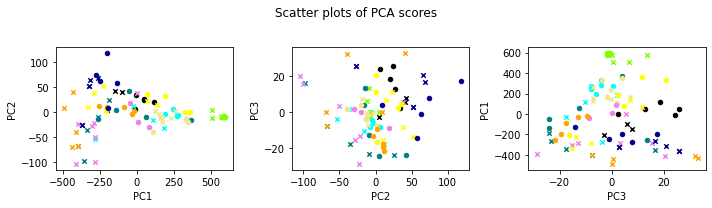

In [97]:
#Assign markers to separate students
col = [
    'black', # Student no 1
    'cyan', 
    'chartreuse', 
    'teal', 
    'khaki', 
    #'red', 
    'violet', # Student no 7
    'yellow', 
    'orange', 
    'darkblue' # Student no 10
]

colors2 = [_col for _col in col for j in range(10)]

#Assign colors to separate confused students from not confused students
markers2 = ["x" if int(student_confused) == 1 else "o" for student_confused in df3['userdefinedlabel']]

#File name
save_name = 'score2.jpg'

#Call plotting function
scorePlots(pc1, pc2, pc3, markers2, colors2, save_name)

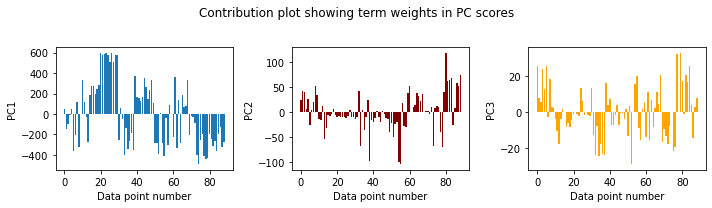

In [138]:
x = np.arange(datapoints)

fig = plt.figure(figsize=[10, 3])
fig.suptitle('Contribution plot showing term weights in PC scores')

ax1 = fig.add_subplot(131)
ax1.bar(x, pc1,)
plt.xlabel('Data point number')
plt.ylabel('PC1')
    
ax2 = fig.add_subplot(132)
ax2.bar(x, pc2, color='maroon')
plt.xlabel('Data point number')
plt.ylabel('PC2')
    
ax3 = fig.add_subplot(133)
ax3.bar(x, pc3, color = 'orange')
plt.xlabel('Data point number')
plt.ylabel('PC3')


fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('contribution.jpg')

In [140]:
# create kmeans object
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(df3)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(df3)

[[-3.63232601e+00 -2.35059433e+00 -5.30806608e-01  2.27905676e+05
   5.77680977e+04  1.38439281e+04  8.89950816e+03  3.90955401e+03
   5.90104079e+03  4.02293264e+03  4.74862091e+02  6.32653061e-01]
 [ 4.44959937e+00  2.87947805e+00  6.50238095e-01 -2.79184453e+05
  -7.07659197e+04 -1.69588119e+04 -1.09018975e+04 -4.78920367e+03
  -7.22877497e+03 -4.92809249e+03 -5.81706061e+02  3.75000000e-01]]


In [145]:
plt.scatter(df3[userdefinedlabel ==0] s=100, c='red')
plt.scatter(df3[userdefinedlabel ==1], s=100, c='black')
# plt.scatter(df3[y_km ==2,0], df3[y_km == 2,1], s=100, c='blue')
# plt.scatter(df3[y_km ==3,0], df3[y_km == 3,1], s=100, c='cyan')

SyntaxError: invalid syntax (<ipython-input-145-e2d230ad3fcb>, line 1)

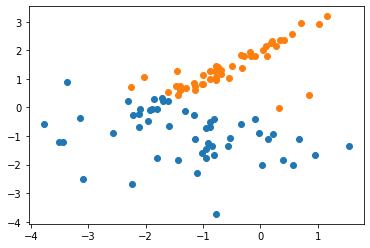

In [104]:

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
# from matplotlib import pyplot
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [120]:
# K-means for the average data with 10 clusters.
kmeans = KMeans(n_clusters = 10).fit_predict(df3)
kmeans

array([8, 1, 4, 4, 8, 3, 1, 8, 6, 4, 5, 8, 4, 7, 0, 5, 5, 0, 0, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 7, 8, 4, 3, 1, 3, 7, 1, 3, 5, 0, 0, 8, 0,
       5, 5, 0, 0, 5, 8, 7, 7, 3, 4, 7, 3, 4, 7, 8, 4, 1, 5, 7, 8, 6, 0,
       8, 8, 5, 1, 4, 4, 4, 3, 9, 7, 1, 3, 3, 9, 6, 6, 6, 6, 3, 1, 1, 6,
       6])

In [121]:
# Add the data with the corresponding cluster values in the dataframe data_ave_cluster.
data_dict = {}
for i in df3:
    data_dict[i] = df3[i]

data_dict['cluster'] = kmeans

df3_cluster = pd.DataFrame(data_dict, index=df3.index)

df3_cluster[:10]

Attention  Meditation        Raw          Delta          Theta  \
Subject Video                                                                   
0.0     0.0     8.891127    0.817561  12.761879  -46194.068646  -34491.822240   
        1.0    -2.744389   -4.387399  -5.424232  149179.413497    1611.004347   
        2.0    -2.386944   -5.691927 -21.069303  103906.274664   -9617.474627   
        3.0     4.691560   -1.164566   0.488883   10296.966190    3198.923434   
        4.0     8.858321   -5.534690  -4.215611  -43974.909163  -32559.123485   
        5.0     3.447191  -11.960048   4.580646  344554.036029  123074.090700   
        6.0   -12.779610   -8.698483   9.999906  194665.004630   53456.738584   
        7.0     1.634183   -2.767757  -5.956375 -112479.425789  -45304.967081   
        8.0     9.182570   -0.129796  -4.659716  323884.136999   39440.303656   
        9.0     3.568609   -5.738336   3.062653   11816.064551  -28676.732304   

                     Alpha1        Alpha2        Beta1         Beta2  \
Subject Video                                                          
0.0     0.0    -1894.291199  -2279.452701  -192.189866  16017.562172   
        1.0    -3678.481278  -3075.648137  1852.802594  13152.340744   
        2.0    -8106.307435  -6491.862423  1583.524727  12199.252313   
        3.0    -5224.572848  -1883.239472 -3089.975158  19451.496598   
        4.0   -15482.259111 -11135.931388 -4345.374253  12175.579414   
        5.0    31880.377839  12595.251398  8331.659388  17209.432091   
        6.0    -3194.466008  -3831.552078  -315.632874   6705.407000   
        7.0   -12859.066993 -11914.505280 -5022.988477  13547.901458   
        8.0     3683.216417  -2225.394681    22.211119  12527.562172   
        9.0   -12157.376126  -7538.649308  -178.303027   4999.283484   

                     Gamma1        Gamma2  userdefinedlabel  cluster  
Subject Video                                                         
0.0     0.0    23724.193521   8525.078037               0.0        8  
        1.0    19754.599076   6231.560180               1.0        1  
        2.0    16902.646964   6258.019939               1.0        4  
        3.0    24414.154814   8274.145660               0.0        4  
        4.0    19019.619766   6470.246141               0.0        8  
        5.0    37062.767369  14365.394094               1.0        3  
        6.0    13165.223214   6077.927175               1.0        1  
        7.0    19322.070505   5426.524466               0.0        8  
        8.0    28416.563593   9264.533683               1.0        6  
        9.0    11176.285962   3401.375169               0.0        4

In [122]:
# Create the lists videos_cluster and subject_cluster where with the cluster values for the videos and the students
# respectively.

videos_cluster = []
subject_cluster = []

for i in range(10):
    videos_cluster.append([])
    subject_cluster.append([])
    _temp_df = df3_cluster[df3_cluster['cluster'] == i]
    for subject, video in _temp_df.index:
        videos_cluster[i].append(video)
        subject_cluster[i].append(subject)
        
        
print(videos_cluster)
print('-----')
print(subject_cluster)

[[4.0, 7.0, 8.0, 1.0, 2.0, 4.0, 7.0, 8.0, 6.0], [1.0, 6.0, 5.0, 8.0, 1.0, 0.0, 7.0, 6.0, 7.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], [5.0, 4.0, 6.0, 9.0, 3.0, 6.0, 4.0, 8.0, 9.0, 5.0], [2.0, 3.0, 9.0, 2.0, 2.0, 4.0, 7.0, 0.0, 1.0, 2.0, 3.0], [0.0, 5.0, 6.0, 9.0, 0.0, 5.0, 6.0, 9.0, 2.0, 9.0], [8.0, 5.0, 1.0, 2.0, 3.0, 4.0, 8.0, 9.0], [3.0, 0.0, 7.0, 1.0, 2.0, 5.0, 8.0, 3.0, 6.0], [0.0, 4.0, 7.0, 1.0, 1.0, 3.0, 0.0, 9.0, 4.0, 7.0, 8.0], [5.0, 0.0]]
-----
[[1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 7.0], [0.0, 0.0, 3.0, 3.0, 7.0, 8.0, 8.0, 9.0, 9.0], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], [0.0, 3.0, 3.0, 3.0, 5.0, 5.0, 8.0, 8.0, 8.0, 9.0], [0.0, 0.0, 0.0, 1.0, 3.0, 5.0, 5.0, 7.0, 8.0, 8.0, 8.0], [1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0, 4.0, 7.0, 7.0], [0.0, 7.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0], [1.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 7.0, 8.0], [0.0, 0.0, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 7.0, 7.0], [8.0, 9.0]]


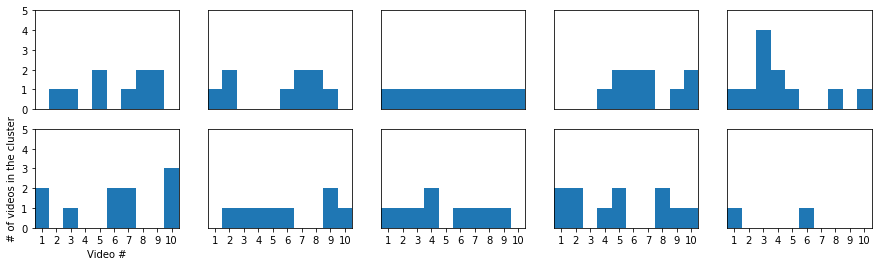

In [124]:
fig = plt.figure(figsize=(15, 4))
axes = []
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    axes.append(ax)
    ax.hist(videos_cluster[i], bins=np.arange(11)-0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(0, 5)
    

for i in range(5):
    axes[i+5].set_xticks(list(range(0, 10)))
    axes[i+5].set_xticklabels([str(i) for i in range(1, 11)])
    
axes[0].set_yticks(list(range(0,6)))
axes[5].set_yticks(list(range(0,6)))
axes[5].set_ylabel('# of videos in the cluster')
axes[5].set_xlabel('Video #')


plt.savefig('k1.jpg')

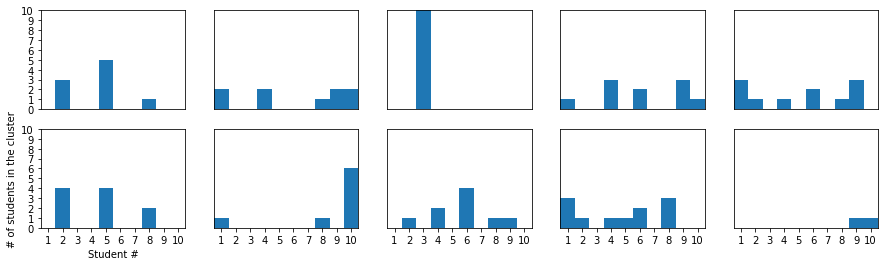

In [125]:
#Histograms of the ten clusters showing which and how many students that are in the clusters.

fig = plt.figure(figsize=(15, 4))
axes = []
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    axes.append(ax)
    ax.hist(subject_cluster[i], bins=np.arange(11)-0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(0, 10)
    

for i in range(5):
    axes[i+5].set_xticks(list(range(0, 10)))
    axes[i+5].set_xticklabels([str(i) for i in range(1, 11)])
    
axes[0].set_yticks(list(range(0,11)))
axes[5].set_yticks(list(range(0,11)))
axes[5].set_ylabel('# of students in the cluster')
axes[5].set_xlabel('Student #')


plt.savefig('k2.jpg')

In [128]:
# K-means with 2 clusters (for the confused/not confused variable), and create a dataframe data_ave_cluster with the 
# data and the corresponding cluster values.

kmeansc = KMeans(n_clusters = 2).fit_predict(df3.values[:, :12])

data_dict = {}
for i in df3:
    data_dict[i] = df3[i]
data_dict['cluster'] = kmeansc

df3_cluster = pd.DataFrame(data_dict, index=df3.index)
print(df3_cluster[:10])

               Attention  Meditation        Raw          Delta          Theta  \
Subject Video                                                                   
0.0     0.0     8.891127    0.817561  12.761879  -46194.068646  -34491.822240   
        1.0    -2.744389   -4.387399  -5.424232  149179.413497    1611.004347   
        2.0    -2.386944   -5.691927 -21.069303  103906.274664   -9617.474627   
        3.0     4.691560   -1.164566   0.488883   10296.966190    3198.923434   
        4.0     8.858321   -5.534690  -4.215611  -43974.909163  -32559.123485   
        5.0     3.447191  -11.960048   4.580646  344554.036029  123074.090700   
        6.0   -12.779610   -8.698483   9.999906  194665.004630   53456.738584   
        7.0     1.634183   -2.767757  -5.956375 -112479.425789  -45304.967081   
        8.0     9.182570   -0.129796  -4.659716  323884.136999   39440.303656   
        9.0     3.568609   -5.738336   3.062653   11816.064551  -28676.732304   

                     Alpha1

In [130]:
# Create list obs_cluster with the cluster values for the two clusters.

userdefined_cluster = []

for i in range(2):
    userdefined_cluster.append([])
    _temp_df = df3_cluster[df3_cluster['cluster'] == i]
    for userdefined_ in _temp_df['userdefinedlabel']:
        userdefined_cluster[i].append(userdefined_)

print(userdefined_cluster)

[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]]


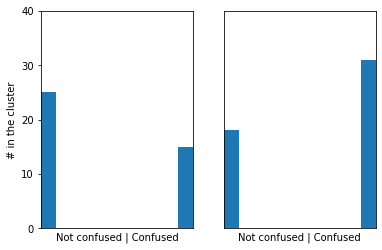

In [133]:
# Histogram of the two clusters with values that are labeled confused or not confused.

fig = plt.figure()
axes = []
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)
    axes.append(ax)
    ax.hist(userdefined_cluster[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 40)
       

axes[0].set_yticks(list(range(0,41, 10)))
axes[0].set_ylabel('# in the cluster')
axes[0].set_xlabel('Not confused | Confused')
axes[1].set_xlabel('Not confused | Confused')

plt.savefig('k3.jpg')